#Bayesian Classification

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
import time
from mlxtend.plotting import plot_decision_regions
#import other modules here

In [ ]:
# Generate synthetic dataset with 2 classes
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, random_state=31)

In [ ]:
#your code here
X.shape, y.shape

((300, 2), (300,))

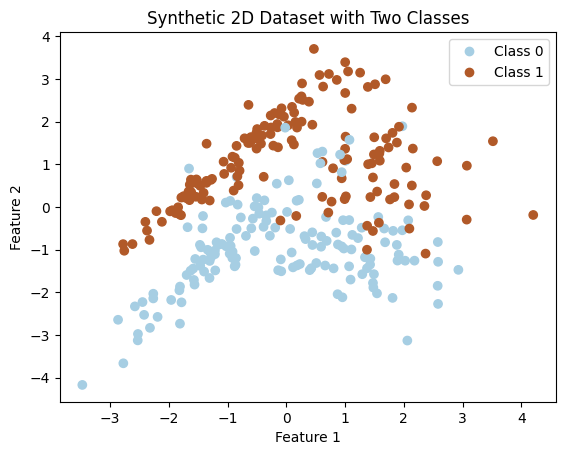

In [ ]:
# Plot the synthetic dataset
scatter_train = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic 2D Dataset with Two Classes')
plt.legend(handles=scatter_train.legend_elements()[0], labels=['Class 0', 'Class 1'])

#Fit two 2D normal distributions to `X[y==0,:]` and `X[y==1,:]`

Probability density function for multivariate normal (Gaussian) distribution $N(\mu,\Sigma)$ is given by
$$
p(x_1,\ldots,x_n) = \frac{1}{\sqrt{(2\pi)^n|\Sigma|}} e ^{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)}.
$$
$\mu$ is an $n$-dimentional vector representing mean and $\Sigma$ is a covariance matrix. In 2D case,
$$
\Sigma = \begin{pmatrix} \sigma^2_1 & cov(X_1,X_2)\\ cov(X_1,X_2) & \sigma_2^2 \end{pmatrix} = \begin{pmatrix} Var(X_1) & cov(X_1,X_2)\\ cov(X_1,X_2) & Var(X_2) \end{pmatrix}.
$$

In [ ]:
from scipy.stats import multivariate_normal

In [ ]:
mu0 = X[y==0,:].mean(axis=0)

In [ ]:
sigma0 = np.cov(X[y==0,:].T)

**Problem 0.** Compute $\mu_1$ and $\Sigma_1$ for class 1.

In [ ]:
mu1 =

In [ ]:
sigma1 =

**Problem 1.** Add in the plot below the level curves for the Gaussian distribution over class 1 $p(x|y=1)=N(\mu_1,\Sigma_1)$.  

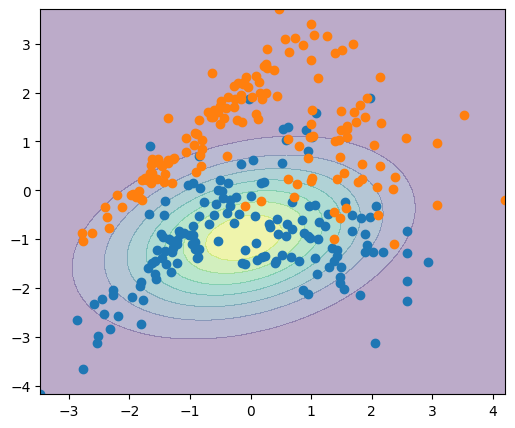

In [ ]:
xx = np.linspace(min(X[:,0]), max(X[:,0]))
yy = np.linspace(min(X[:,1]), max(X[:,1]))
X_gr, Y_gr = np.meshgrid(xx, yy)
XX = np.dstack((X_gr, Y_gr))
Z0 = multivariate_normal.pdf(XX, mean=mu0, cov=sigma0)

plt.figure(figsize= (6,5))
plt.contourf(xx, yy, Z0, alpha=0.2)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

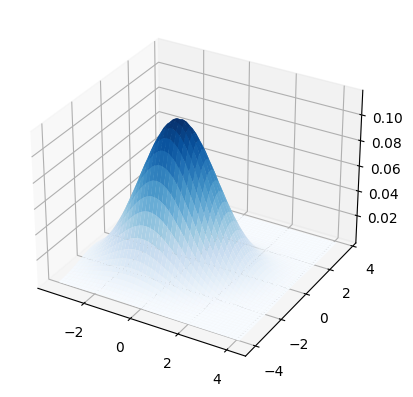

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
from matplotlib import cm
ax.plot_surface(XX[:,:,0], XX[:,:,1], Z0, cmap=cm.Blues)
#ax.plot_surface(XX[:,:,0], XX[:,:,1], Z1)

**Problem 2.** Compute distribution of the target $p(y),$ i.e., $p_0=P(Y=0)$ and $p_1=P(Y=1)$. You may use `np.unique(y, return_counts=True)`

In [ ]:
labels, counts =

In [ ]:
p0, p1 = counts/len(y)

Now, we calculate
$$
y_{pred} = argmax \{p(y=0|x),\ p(y=1|x)\}  
$$
Instead of the maximum of the true probability
$$
p(y=0|x) = \frac{p(x,y)}{p(x)} = \frac{p(x|y=0)p(y=0)}{p(x)}
$$
we can look at the numerater only (because $x$ is fixed)
$$
y_{pred} = argmax \{p(x,y=0),\ p(x,y=1)\}.  
$$

In [ ]:
y_pred = np.argmax(np.dstack((multivariate_normal.pdf(X, mean=mu0, cov=sigma0)*p0, multivariate_normal.pdf(X, mean=mu1, cov=sigma1)*p1))[0], axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y,y_pred)

0.84

**Problem 3.** Compute Naive Bayes prediction and accuracy. Instead of $p(x|y=0) = N(\mu_0, \Sigma_0),$ with $\mu_0=(\mu_{0,x_1}, \mu_{0,x_2})$ use
$$
p(x|y=0)= p(x_1|y=0)p(x_2|y=0) = N(\mu_{0,x_1}, \Sigma_{0,x_1})N(\mu_{0,x_2}, \Sigma_{0,x_2}),
$$

Instead  `multivariate_normal.pdf(X, mean=mu0, cov=sigma0)` you can use `multivariate_normal.pdf(X[:0], mean=mu0[0], cov=sigma0[0][0])*multivariate_normal.pdf(X[:1], mean=mu0[1], cov=sigma0[1][1])`

**Problem 4.**
In this Question you will work with dataset from Ch.2 in *Classification, Parameter Estimation and State
Estimation: An Engineering Approach Using MATLAB* by
R. Duin, F. van der Heijden, D. de Ridder, and D. M.
J. Tax https://go.exlibris.link/Y6BQ8cJ5

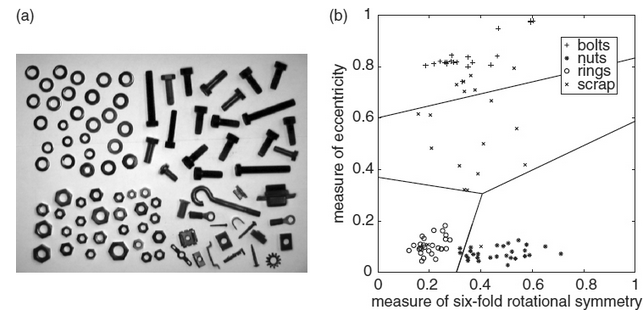

In [ ]:
#data = pd.read_csv('data_bnrs.csv', header=None)
data = pd.read_csv('https://raw.githubusercontent.com/anton-selitskiy/RIT_ML/main/2023_fall/data_bnrs.csv', header=None)

In [ ]:
data.head()

,0,1,2
0,0.35029,0.79978,1
1,0.60302,0.97778,1
2,0.32696,0.74125,1
3,0.35015,0.83668,1
4,0.46741,0.94682,1


In [ ]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

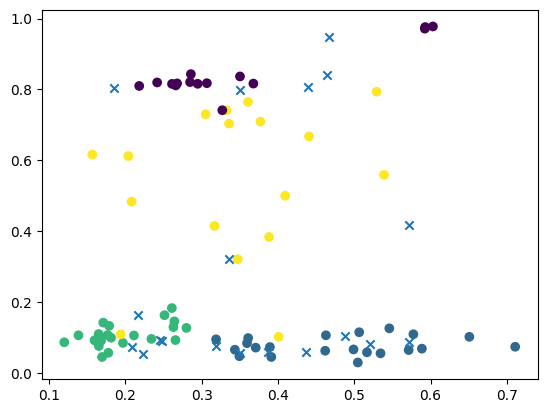

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.scatter(X_test[:,0], X_test[:,1], marker='x')

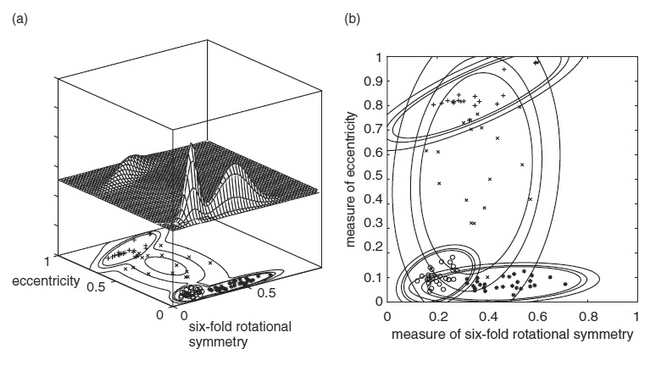

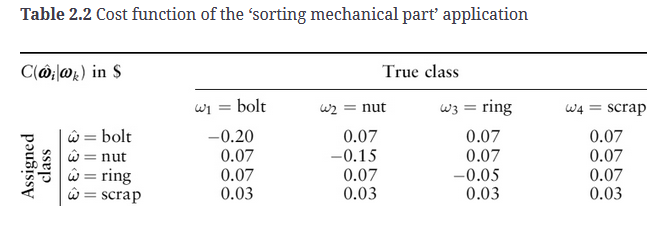

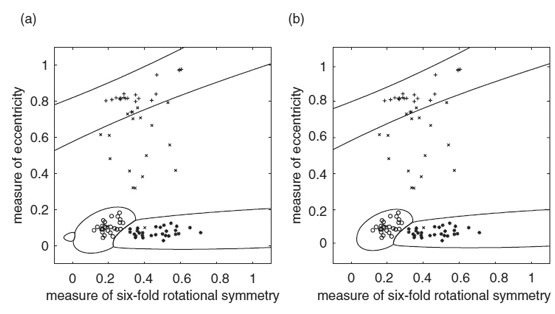

From the conditional probability formula, we know that
$$
p(y=c|x) = \frac{p(x, y=c)}{p(x)} = \frac{p(x|y=c)p(y=c)}{p(x)}, \quad c=1,2,3,4.
$$

Because the denominator doesn't depend on $c,$
$$
a(x) = \underset{c}{argmax}\ p(y=c|x) = \underset{c}{argmax}\ p(x|y=c)p(y=c).
$$

We will assume that conditional distribution $p(x|y=c)\sim N(\mu_c,\Sigma_c)$ you can use `multivariate_normal` from `scipy.stats` to calculate this value for the entier matix $X$ with datapoints in rows $X[i,:]$ as follows: `multivariate_normal(X, mean=, cov=)`.

For the Cost function, you can use the following decision rule:
$$
a(x) = argmin\ \text{Cost_Matrix}\cdot \begin{bmatrix}p(y=1|x)\\ p(y=2|x) \\ p(y=3|x)\\ p(y=4|x)\end{bmatrix} = argmin\ \text{Cost_Matrix}\cdot \begin{bmatrix}p(x|y=1)p(y=1)\\ p(x|y=2)p(y=2) \\ p(x|y=3)p(y=3)\\ p(x|y=4)p(y=4)\end{bmatrix}.
$$

In [ ]:
from scipy.stats import multivariate_normal

In [ ]:
class user():
    def __init__(self, cost=False) -> None:
        self.cost = cost

    def fit(self, X, y):
      self.m1 = X[y==1].mean(axis=0)
      self.m2 = X[y==2].mean(axis=0)
      self.m3 = X[y==3].mean(axis=0)
      self.m4 = X[y==4].mean(axis=0)
      self.C1 = np.cov(X[y==1].T)
      self.C2 = np.cov(X[y==2].T)
      self.C3 = np.cov(X[y==3].T)
      self.C4 = np.cov(X[y==4].T)
      unique_elements, counts = np.unique(y, return_counts=True)
      self.p1, self.p2, self.p3, self.p4 = counts/len(y)

    def post(self, X):
      return np.argmax([multivariate_normal.pdf(X, mean=self.m1, cov=self.C1)*self.p1,
                       multivariate_normal.pdf(X, mean=self.m2, cov=self.C2)*self.p2,
                       multivariate_normal.pdf(X, mean=self.m3, cov=self.C3)*self.p3,
                       multivariate_normal.pdf(X, mean=self.m4, cov=self.C4)*self.p4], axis=0)
    def post_cost(self, X):
      cost_matrix = np.array([
        [ -0.20, 0.07, 0.07, 0.07 ],
        [  0.07,-0.15, 0.07, 0.07 ],
        [  0.07, 0.07,-0.05, 0.07 ],
        [  0.03, 0.03, 0.03, 0.03 ]])

      #your code here

    def predict(self, X):
      if self.cost == True:
        return self.post_cost(X)
      return self.post(X)

In [ ]:
X_train.shape

(75, 2)

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
clf = user()

In [ ]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

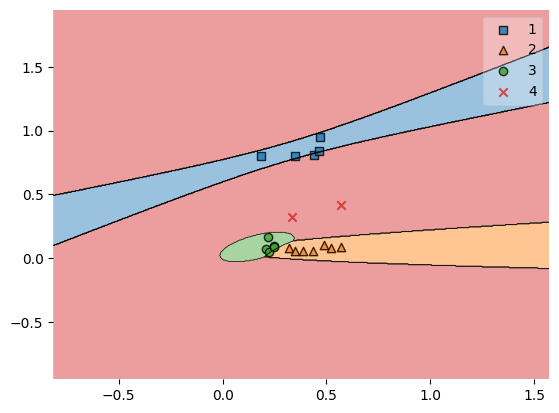

In [ ]:
plot_decision_regions(X_test,y_test,clf)

In [ ]:
clf_cost = user(cost=True)

In [ ]:
clf_cost.fit(X_train, y_train)

<Axes: >

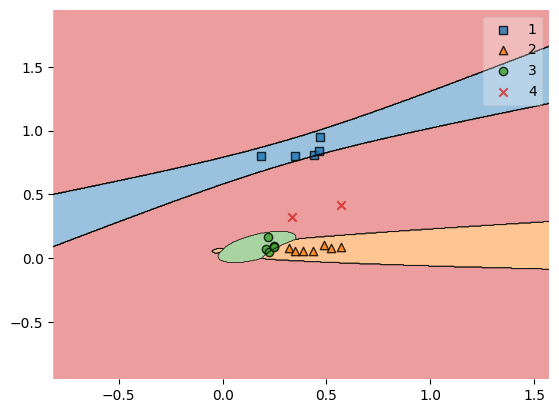

In [ ]:
plot_decision_regions(X_test,y_test,clf_cost)